In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('FastFoodNutritionMenuV3.csv')
df.head()

,Company,Item,Calories,Calories from\nFat,Total Fat\n(g),Saturated Fat\n(g),Trans Fat\n(g),Cholesterol\n(mg),Sodium \n(mg),Carbs\n(g),Fiber\n(g),Sugars\n(g),Protein\n(g),Weight Watchers\nPnts
0,McDonald’s,Hamburger,250,80,9,3.5,0.5,25,520,31,2,6,12,247.5
1,McDonald’s,Cheeseburger,300,110,12,6,0.5,40,750,33,2,6,15,297
2,McDonald’s,Double Cheeseburger,440,210,23,11,1.5,80,1150,34,2,7,25,433
3,McDonald’s,McDouble,390,170,19,8,1,65,920,33,2,7,22,383
4,McDonald’s,Quarter Pounder® with Cheese,510,230,26,12,1.5,90,1190,40,3,9,29,502


In [17]:
columns = df.columns
numeric_columns = columns[2:]

for col in numeric_columns:
  df[col] = pd.to_numeric(df[col], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1147 entries, 0 to 1146
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1147 non-null   object 
 1   Item                  1147 non-null   object 
 2   Calories              1133 non-null   float64
 3   Calories from
Fat     630 non-null    float64
 4   Total Fat
(g)         1079 non-null   float64
 5   Saturated Fat
(g)     1079 non-null   float64
 6   Trans Fat
(g)         1079 non-null   float64
 7   Cholesterol
(mg)      1119 non-null   float64
 8   Sodium 
(mg)          1132 non-null   float64
 9   Carbs
(g)             1078 non-null   float64
 10  Fiber
(g)             1064 non-null   float64
 11  Sugars
(g)            1118 non-null   float64
 12  Protein
(g)           1079 non-null   float64
 13  Weight Watchers
Pnts  876 non-null    float64
dtypes: float64(12), object(2)
memory usage: 125.6+ KB


### Câu hỏi
Tìm Hiểu về Mức Chất Béo và Calo:
- Xác định các món ăn có hàm lượng calo hoặc chất béo cao nhất và thấp nhất.
- Phân tích mối quan hệ giữa calo và chất béo (ví dụ: liệu món ăn có calo cao có xu hướng có nhiều chất béo không?).

**Xác định các món ăn có hàm lượng calo hoặc chất béo cao nhất và thấp nhất:**

- **Ý Nghĩa**: Phân tích này giúp xác định các món ăn "nặng" và "nhẹ" nhất về mặt năng lượng và chất béo, hữu ích cho việc lựa chọn thực phẩm dựa trên mục tiêu dinh dưỡng cá nhân (ví dụ: giảm cân, tăng cân, chế độ ăn ít chất béo).
- **Cách Làm**: Sắp xếp dữ liệu dựa trên cột calo và tổng chất béo, sau đó xác định các món ăn có giá trị cao nhất và thấp nhất.

**Phân tích mối quan hệ giữa calo và chất béo:**
- **Ý Nghĩa**: Phân tích này giúp hiểu rõ mối quan hệ giữa lượng calo và chất béo trong các món ăn. Việc này có thể tiết lộ liệu chất béo có phải là nguồn chính của calo trong thực phẩm hay không.
- **Cách Làm**: Sử dụng biểu đồ phân tán (scatter plot) để mô tả mối quan hệ giữa calo và tổng chất béo.

In [9]:
# Identifying the items with the highest and lowest calorie and fat content
highest_calories = df.nlargest(1, 'Calories')
lowest_calories = df.nsmallest(1, 'Calories')
highest_fat = df.nlargest(1, 'Total Fat\n(g)')
lowest_fat = df.nsmallest(1, 'Total Fat\n(g)')

# Compile the results
extreme_values = {
    "Highest Calorie Item": highest_calories[['Item', 'Calories']],
    "Lowest Calorie Item": lowest_calories[['Item', 'Calories']],
    "Highest Fat Item": highest_fat[['Item', 'Total Fat\n(g)']],
    "Lowest Fat Item": lowest_fat[['Item', 'Total Fat\n(g)']]
}

extreme_values

{'Highest Calorie Item':                                      Item  Calories
 334  Triple Whopper® Sandwich with Cheese    1220.0,
 'Lowest Calorie Item':            Item  Calories
 38  Salt Packet       0.0,
 'Highest Fat Item':                       Item  Total Fat\n(g)
 730  Potato Salad (Family)            98.0,
 'Lowest Fat Item':               Item  Total Fat\n(g)
 37  Ketchup Packet             0.0}

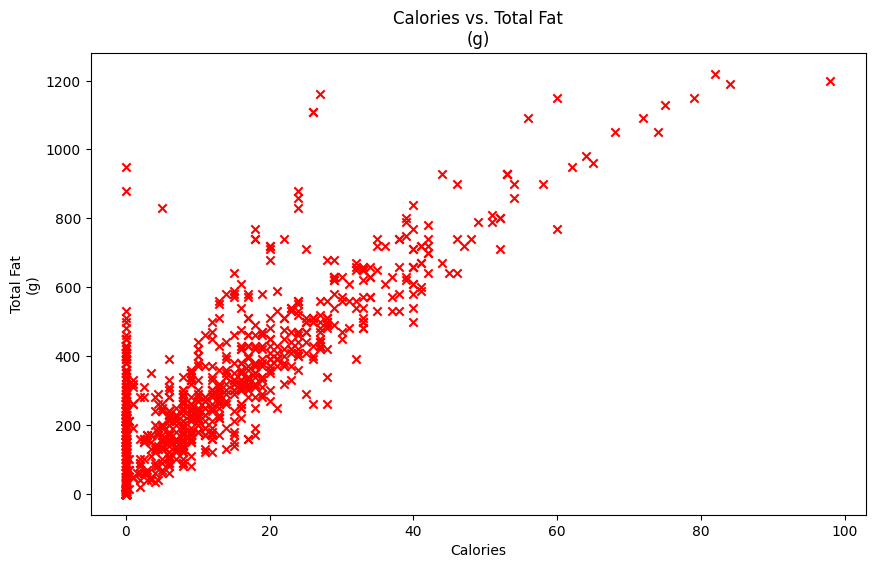

In [16]:
# scatter plot of calories vs. fat
plt.figure(figsize=(10, 6))
plt.scatter(df['Total Fat\n(g)'], df['Calories'], marker='x', color='red')
plt.xlabel('Calories')
plt.ylabel('Total Fat\n(g)')
plt.title('Calories vs. Total Fat\n(g)')
plt.show()


Có một xu hướng tăng dần: Khi lượng chất béo tăng, lượng calo cũng có xu hướng tăng theo. Điều này có nghĩa là các món ăn có nhiều chất béo thường chứa nhiều calo hơn.

Mối quan hệ không hoàn toàn tuyến tính: Mặc dù có xu hướng tăng, nhưng mối quan hệ giữa chất béo và calo không hoàn toàn tuyến tính. Điều này cho thấy có các yếu tố khác cũng đóng góp vào lượng calo của món ăn (ví dụ: carbs, protein).

Ý nghĩa

Phân tích này có thể hữu ích cho những người đang theo dõi lượng calo và chất béo trong chế độ ăn uống của mình. Nó cung cấp cái nhìn tổng quan về cách thức lượng chất béo ảnh hưởng đến lượng calo, giúp họ lựa chọn các món ăn phù hợp với mục tiêu dinh dưỡng của mình.

Xác định các món ăn có điểm Weight Watchers thấp:

Ý Nghĩa: Mục tiêu là tìm ra những món ăn có số điểm Weight Watchers thấp, được coi là lựa chọn tốt cho việc giảm cân. Điểm Weight Watchers thấp thường chỉ ra rằng món ăn có ít calo, ít chất béo và đường, và/hoặc nhiều chất xơ.
Cách Làm: Sắp xếp dữ liệu dựa trên cột điểm Weight Watchers để xác định các món ăn có điểm thấp nhất.
So sánh điểm Weight Watchers giữa các công ty hoặc loại món ăn:

Ý Nghĩa: Phân tích này giúp so sánh lựa chọn thực phẩm giữa các công ty khác nhau từ góc độ giảm cân và sức khỏe. Điều này hữu ích cho những người theo dõi chế độ ăn kiêng và muốn lựa chọn thực phẩm tốt cho sức khỏe.
Cách Làm: Tính giá trị trung bình của điểm Weight Watchers cho mỗi công ty hoặc loại món ăn và so sánh chúng.

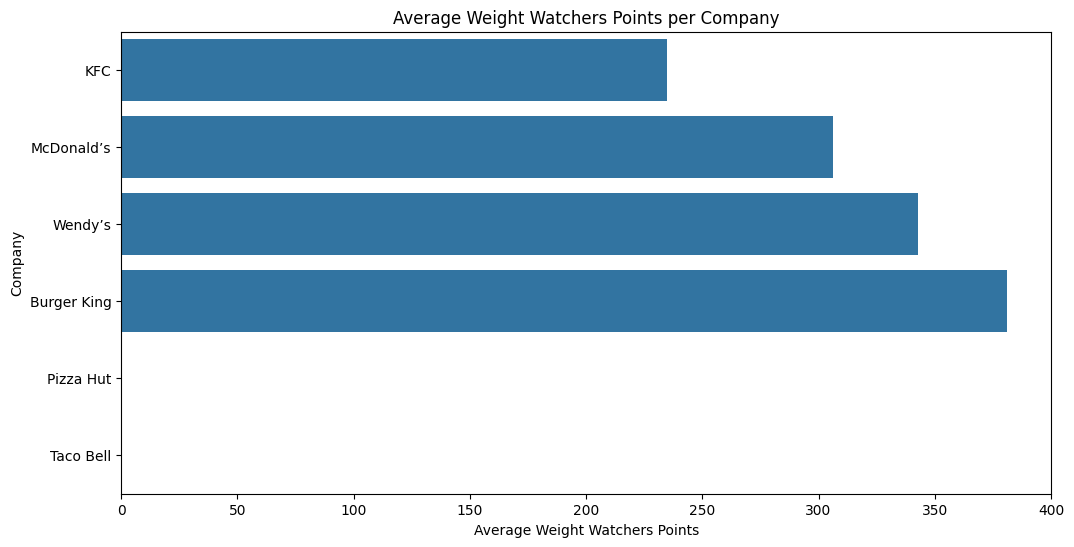

(        Company                 Item  Weight Watchers\nPnts
 38   McDonald’s          Salt Packet                    0.0
 147  McDonald’s        Dasani® Water                    0.0
 155  McDonald’s   Diet Coke® (Child)                    0.0
 156  McDonald’s   Diet Coke® (Small)                    0.0
 157  McDonald’s  Diet Coke® (Medium)                    0.0,
 Company
 KFC            234.901376
 McDonald’s     306.426154
 Wendy’s        342.850649
 Burger King    381.011173
 Pizza Hut             NaN
 Taco Bell             NaN
 Name: Weight Watchers\nPnts, dtype: float64)

In [22]:
# Convert 'Weight Watchers\nPnts' to numeric, coercing errors
df['Weight Watchers\nPnts'] = pd.to_numeric(df['Weight Watchers\nPnts'], errors='coerce')

# Find items with the lowest Weight Watchers points
lowest_ww_points = df.nsmallest(5, 'Weight Watchers\nPnts')[['Company', 'Item', 'Weight Watchers\nPnts']]

# Now let's calculate the average Weight Watchers points for each company
average_ww_points_per_company = df.groupby('Company')['Weight Watchers\nPnts'].mean().sort_values()

# Preparing for visualization
companies = average_ww_points_per_company.index.tolist()
average_points = average_ww_points_per_company.values

# Create bar chart for the average Weight Watchers points per company
plt.figure(figsize=(12, 6))
sns.barplot(x=average_points, y=companies)
plt.title('Average Weight Watchers Points per Company')
plt.xlabel('Average Weight Watchers Points')
plt.ylabel('Company')

# Show the plot
plt.show()

lowest_ww_points, average_ww_points_per_company

Các Món Ăn Có Điểm Weight Watchers Thấp Nhất:

Một số món ăn từ McDonald’s như "Salt Packet", "Dasani® Water", "Diet Coke® (Child)", "Diet Coke® (Small)", và "Diet Coke® (Medium)" đều có 0 điểm Weight Watchers, làm chúng trở thành lựa chọn tốt cho việc giảm cân.
So Sánh Điểm Weight Watchers Trung Bình Giữa Các Công Ty:

KFC có điểm Weight Watchers trung bình thấp nhất, theo sau là McDonald’s và Wendy’s.
Burger King có điểm trung bình cao hơn so với các công ty khác.
Lưu ý: Dữ liệu cho Pizza Hut và Taco Bell không đủ để tính điểm trung bình.

Phân tích này giúp những người theo dõi chế độ ăn kiêng Weight Watchers hoặc những người quan tâm đến việc giảm cân và duy trì sức khỏe hiểu rõ hơn về lựa chọn thực phẩm tại các chuỗi nhà hàng nhanh. Nó cung cấp cái nhìn sâu sắc về việc chọn thực phẩm ít calo, ít chất béo và đường, nhưng giàu chất xơ, từ các chuỗi cửa hàng này. ​